<a href="https://colab.research.google.com/github/D03S08/DataMiningClassKelompok4/blob/main/TUGAS_1_DATA_MINING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Library

In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Baca File

In [175]:
harga_rumah = pd.read_csv('https://raw.githubusercontent.com/D03S08/DataMiningClassKelompok4/main/Tugas%2001%20Data%20Mining%20-%20Kelompok%204.csv')
harga_rumah.head(10)

,No,Tgl_Iklan,url,harga,Kota,LT,LB,KT,KM,KTP,KMP,carport,garasi,listrik,surat,judul,deskripsi
0,1,02-03-2021,https://www.rumah123.com/properti/bekasi/hos79...,2750000000,Bekasi,162.0,179,4,3.0,1,1,2,1,2200.0,SHM,RUMAH MAPLE Summarecon Bekasi JARANG ADA lebar...,RUMAH MAPLE Summarecon Bekasi JARANG ADA lebar...
1,2,02-03-2021,https://www.rumah123.com/properti/bekasi/hos43...,1850000000,Bekasi,119.0,126,2,2.0,0,0,1,1,2200.0,HGB,RUMAH Cluster BLUEBELL@Summarecon Bekasi Dekat...,RUMAH Cluster BLUEBELL @ Summarecon Bekasi Dek...
2,3,05-03-2021,https://www.rumah123.com/properti/bekasi/hos73...,825000000,Bekasi,128.0,65,3,2.0,0,0,1,0,2200.0,SHM,"Rumah Anti Virus, 3 Kamar, dekat waterpark, St...","Rumah Anti Virus *, 3 Kamar, Strategis di Jati..."
3,4,05-03-2021,https://www.rumah123.com/properti/bekasi/hos78...,3450000000,Bekasi,224.0,260,4,4.0,1,0,1,0,2200.0,SHM,Rumah Mewah Siap Huni di Jaka Permai Bekasi,DIJUAL & SIAP HUNI : Dijual Rumah di Perum Jak...
4,5,08-03-2021,https://www.rumah123.com/properti/bekasi/hos75...,700000000,Bekasi,77.0,50,3,2.0,0,0,1,0,2200.0,SHM,Hunian Cantik nan Asri NUCIFERA RESIDENCE,MILIKI HUNIAN CANTIK DESAIN MENARIK HATI\n\n*N...
5,6,10-03-2021,https://www.rumah123.com/properti/bekasi/hos78...,1100000000,Bekasi,81.0,144,3,2.0,1,1,1,0,2200.0,SHM,Rumah Minimalis Siap Huni Murah dan Strategis ...,Spesifikasi :\nSHM + IMB\nLB : 140 m2\nLT : 81...
6,7,12-03-2021,https://www.rumah123.com/properti/bekasi/hos74...,1925000000,Bekasi,144.0,157,3,3.0,1,1,2,0,2200.0,SHM,Rumah brand new 2lt 8x18 144m Type 3+1KT di Cl...,Rumah brand new 2lt 8x18 144m Type 3+1KT di Cl...
7,8,13-03-2021,https://www.rumah123.com/properti/bekasi/hos80...,471000000,Bekasi,72.0,40,2,1.0,0,0,1,0,1300.0,SHM,"Hunian Asri Dalam Cluster Di Bekasi Utara, Dek...",Rumah cluster minimalis dekat summarecon di ke...
8,9,14-03-2021,https://www.rumah123.com/properti/bekasi/hos80...,965000000,Bekasi,65.0,80,3,2.0,1,1,2,0,2200.0,SHM,Cluster Baru Eksklusif di Jatiwaringin Pondok ...,Rumah Cluster Eksklusif dekat Jalan Raya Jatiw...
9,10,15-03-2021,https://www.rumah123.com/properti/bekasi/hos79...,2800000000,Bekasi,216.0,200,4,4.0,1,1,1,1,2200.0,SHM,cepat rumah hook type premium di blue bell Sum...,Dijual cepat\nRumah hook termurah siap huni di...


# Removing Variabel

In [176]:
harga_rumah.columns

Index(['No', 'Tgl_Iklan', 'url', 'harga', 'Kota', 'LT', 'LB', 'KT', 'KM',
       'KTP', 'KMP', 'carport', 'garasi', 'listrik', 'surat', 'judul',
       'deskripsi'],
      dtype='object')

In [177]:
# Drop no, url, judul, dan deskripsi karena variabel tersebut tidak mempengaruhi harga
rumah = harga_rumah.copy()
rumah.drop(['No','url','judul','deskripsi'], axis=1, inplace=True)
rumah.head()

,Tgl_Iklan,harga,Kota,LT,LB,KT,KM,KTP,KMP,carport,garasi,listrik,surat
0,02-03-2021,2750000000,Bekasi,162.0,179,4,3.0,1,1,2,1,2200.0,SHM
1,02-03-2021,1850000000,Bekasi,119.0,126,2,2.0,0,0,1,1,2200.0,HGB
2,05-03-2021,825000000,Bekasi,128.0,65,3,2.0,0,0,1,0,2200.0,SHM
3,05-03-2021,3450000000,Bekasi,224.0,260,4,4.0,1,0,1,0,2200.0,SHM
4,08-03-2021,700000000,Bekasi,77.0,50,3,2.0,0,0,1,0,2200.0,SHM


# Mengoreksi tipe variabel

In [178]:
rumah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Tgl_Iklan  100 non-null    object 
 1   harga      100 non-null    int64  
 2   Kota       100 non-null    object 
 3   LT         99 non-null     float64
 4   LB         100 non-null    int64  
 5   KT         100 non-null    int64  
 6   KM         97 non-null     float64
 7   KTP        100 non-null    int64  
 8   KMP        100 non-null    int64  
 9   carport    100 non-null    int64  
 10  garasi     100 non-null    int64  
 11  listrik    94 non-null     float64
 12  surat      100 non-null    object 
dtypes: float64(3), int64(7), object(3)
memory usage: 10.3+ KB


In [179]:
# Menyesuaikan tipe data dari Tgl_Iklan dan Surat ke tipe data yang semestinya
rumah['Tgl_Iklan']= pd.to_datetime(rumah['Tgl_Iklan'],dayfirst=True)
rumah['surat']=rumah['surat'].astype('category')
rumah.dtypes

Tgl_Iklan    datetime64[ns]
harga                 int64
Kota                 object
LT                  float64
LB                    int64
KT                    int64
KM                  float64
KTP                   int64
KMP                   int64
carport               int64
garasi                int64
listrik             float64
surat              category
dtype: object

# Mengecek data duplikat

In [180]:
rumah.duplicated().any()

False

In [181]:
rumah.drop(['Tgl_Iklan','Kota'], axis=1, inplace=True)

# Variable selection

### Memisahkan variabel numerik dan kategorik

In [182]:
price_num = rumah.select_dtypes(include=['int64','float64'])
price_num.head()

,harga,LT,LB,KT,KM,KTP,KMP,carport,garasi,listrik
0,2750000000,162.0,179,4,3.0,1,1,2,1,2200.0
1,1850000000,119.0,126,2,2.0,0,0,1,1,2200.0
2,825000000,128.0,65,3,2.0,0,0,1,0,2200.0
3,3450000000,224.0,260,4,4.0,1,0,1,0,2200.0
4,700000000,77.0,50,3,2.0,0,0,1,0,2200.0


In [183]:
price_cat = rumah.select_dtypes(include=['category'])
price_cat.head()

,surat
0,SHM
1,HGB
2,SHM
3,SHM
4,SHM


# Dasar pengolahan variabel kategorik: Dummy Variable


In [184]:
df = pd.get_dummies(rumah['surat'])
df.head()

,HGB,PPJB,SHM,Strata
0,0,0,1,0
1,1,0,0,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [185]:
df2 = pd.concat([rumah,df],axis=1)
df2.head().transpose()

,0,1,2,3,4
harga,2750000000,1850000000,825000000,3450000000,700000000
LT,162,119,128,224,77
LB,179,126,65,260,50
KT,4,2,3,4,3
KM,3,2,2,4,2
KTP,1,0,0,1,0
KMP,1,0,0,0,0
carport,2,1,1,1,1
garasi,1,1,0,0,0
listrik,2200,2200,2200,2200,2200


# Outliers

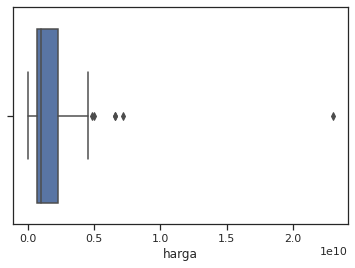

In [186]:
sns.boxplot('harga', data=rumah);


Terdapat outlier yang memiliki rentang data yang jauh berdasarkan harga

### Removing Outliers

In [187]:
from numpy import quantile
def outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] <= fence_low) | (df_in[col_name] >= fence_high)]
    return df_out

In [188]:
high_price = outlier(rumah, 'harga').reset_index()
high_price

,index,harga,LT,LB,KT,KM,KTP,KMP,carport,garasi,listrik,surat
0,46,6600000000,500.0,800,4,3.0,1,1,1,1,10000.0,SHM
1,54,5000000000,435.0,368,6,4.0,0,0,1,1,3300.0,HGB
2,59,4800000000,200.0,293,6,4.0,0,0,2,2,5500.0,SHM
3,95,23000000000,501.0,510,4,NaN,0,0,2,0,4400.0,HGB
4,96,7139000000,266.0,326,4,4.0,0,0,3,0,4400.0,HGB
5,98,6601100000,386.0,216,4,4.0,0,0,3,0,4400.0,HGB


In [189]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [190]:
low_price = remove_outlier(rumah, 'harga').reset_index()
low_price

,index,harga,LT,LB,KT,KM,KTP,KMP,carport,garasi,listrik,surat
0,0,2750000000,162.0,179,4,3.0,1,1,2,1,2200.0,SHM
1,1,1850000000,119.0,126,2,2.0,0,0,1,1,2200.0,HGB
2,2,825000000,128.0,65,3,2.0,0,0,1,0,2200.0,SHM
3,3,3450000000,224.0,260,4,4.0,1,0,1,0,2200.0,SHM
4,4,700000000,77.0,50,3,2.0,0,0,1,0,2200.0,SHM
...,...,...,...,...,...,...,...,...,...,...,...,...
89,92,855800000,66.0,55,2,NaN,0,0,2,0,1300.0,HGB
90,93,680900000,70.0,40,2,NaN,0,0,1,0,1300.0,SHM
91,94,130000000,120.0,157,4,3.0,1,1,2,0,2200.0,HGB
92,97,1140700000,55.0,69,2,2.0,0,0,1,0,2200.0,HGB


### 

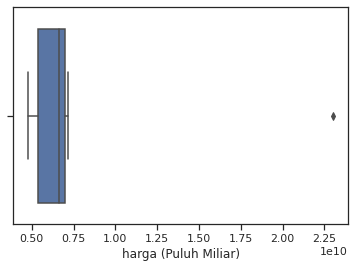

In [230]:
sns.boxplot('harga',data=high_price)
plt.xlabel('harga (Puluh Miliar)');


Seperti yang terlihat pada visualisasi terdapat satu pencilan dan setelah kita lihat kembali ternyata pencilan itu adalah harga dari sebuah asrama yang memiliki luas tanah dan luas bangunan yang terlalu besar. Sedangkan sisanya termasuk outlier karena memiliki harga yang melambung tinggi dan sebuah error atau noise

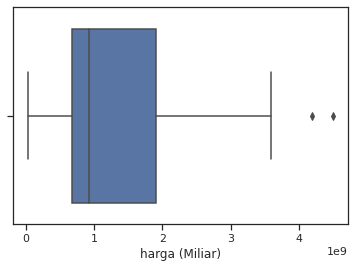

In [192]:
sns.boxplot('harga',data=low_price);
plt.xlabel('harga (Miliar)');


Visualisasi diatas adalah data selain outlier yang telah dipisahkan sebelumnya

Karena rentang outlier yang terlalu jauh sehingga saat dipisahkan masih terdapat outlier yang tersisa, namun hasil yang sekarang cukup baik untuk diolah dibandingkan sebelumnya

# Missing Values

## Penanganan High Price

In [193]:
high_price.isna().sum()

index      0
harga      0
LT         0
LB         0
KT         0
KM         1
KTP        0
KMP        0
carport    0
garasi     0
listrik    0
surat      0
dtype: int64

In [231]:
high_price['KM'].fillna(high_price.KM.median(),inplace=True)
high_price

,index,harga,LT,LB,KT,KM,KTP,KMP,carport,garasi,listrik,surat
0,46,6600000000,500.0,800,4,3.0,1,1,1,1,10000.0,SHM
1,54,5000000000,435.0,368,6,4.0,0,0,1,1,3300.0,HGB
2,59,4800000000,200.0,293,6,4.0,0,0,2,2,5500.0,SHM
3,95,23000000000,501.0,510,4,4.0,0,0,2,0,4400.0,HGB
4,96,7139000000,266.0,326,4,4.0,0,0,3,0,4400.0,HGB
5,98,6601100000,386.0,216,4,4.0,0,0,3,0,4400.0,HGB


In [196]:
high_price.isnull().sum()

index      0
harga      0
LT         0
LB         0
KT         0
KM         0
KTP        0
KMP        0
carport    0
garasi     0
listrik    0
surat      0
dtype: int64

## Penanganan Low Price

In [197]:
low_price.isnull().sum()

index      0
harga      0
LT         1
LB         0
KT         0
KM         2
KTP        0
KMP        0
carport    0
garasi     0
listrik    6
surat      0
dtype: int64

In [199]:
low_price['LT'].fillna(low_price.LT.mean(),inplace=True)
low_price['KM'].fillna(low_price.KM.mean(),inplace=True)
low_price['listrik'].fillna(low_price.listrik.median(),inplace=True)

In [200]:
low_price.isnull().sum()

index      0
harga      0
LT         0
LB         0
KT         0
KM         0
KTP        0
KMP        0
carport    0
garasi     0
listrik    0
surat      0
dtype: int64

# Statistika Deskriptif

In [201]:
high_price.describe()

,index,harga,LT,LB,KT,KM,KTP,KMP,carport,garasi,listrik
count,6.000000,6.000000e+00,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,74.666667,8.856683e+09,381.333333,418.833333,4.666667,3.833333,0.166667,0.166667,2.000000,0.666667,5333.333333
std,24.113620,6.992779e+09,124.488821,210.607138,1.032796,0.408248,0.408248,0.408248,0.894427,0.816497,2389.700121
min,46.000000,4.800000e+09,200.000000,216.000000,4.000000,3.000000,0.000000,0.000000,1.000000,0.000000,3300.000000
25%,55.250000,5.400000e+09,296.000000,301.250000,4.000000,4.000000,0.000000,0.000000,1.250000,0.000000,4400.000000
50%,77.000000,6.600550e+09,410.500000,347.000000,4.000000,4.000000,0.000000,0.000000,2.000000,0.500000,4400.000000
75%,95.750000,7.004525e+09,483.750000,474.500000,5.500000,4.000000,0.000000,0.000000,2.750000,1.000000,5225.000000
max,98.000000,2.300000e+10,501.000000,800.000000,6.000000,4.000000,1.000000,1.000000,3.000000,2.000000,10000.000000


In [202]:
low_price.describe()

,index,harga,LT,LB,KT,KM,KTP,KMP,carport,garasi,listrik
count,94.000000,9.400000e+01,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000
mean,47.893617,1.320496e+09,114.032258,107.085106,2.744681,2.010870,0.308511,0.255319,1.074468,0.159574,1996.808511
std,28.657213,9.956376e+08,65.312063,72.466034,0.960915,0.989130,0.508563,0.438378,0.420940,0.396305,728.742049
min,0.000000,3.400000e+07,29.000000,29.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,900.000000
25%,23.250000,6.764750e+08,70.000000,60.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1300.000000
50%,47.500000,9.223475e+08,90.000000,81.000000,3.000000,2.000000,0.000000,0.000000,1.000000,0.000000,2200.000000
75%,72.750000,1.906250e+09,142.500000,140.250000,3.000000,2.752717,1.000000,0.750000,1.000000,0.000000,2200.000000
max,99.000000,4.500000e+09,306.000000,350.000000,7.000000,5.000000,2.000000,1.000000,2.000000,2.000000,4400.000000


# Visualize

### Bagaimanakah hubungan yang dimiliki antar variabel dalam data ini

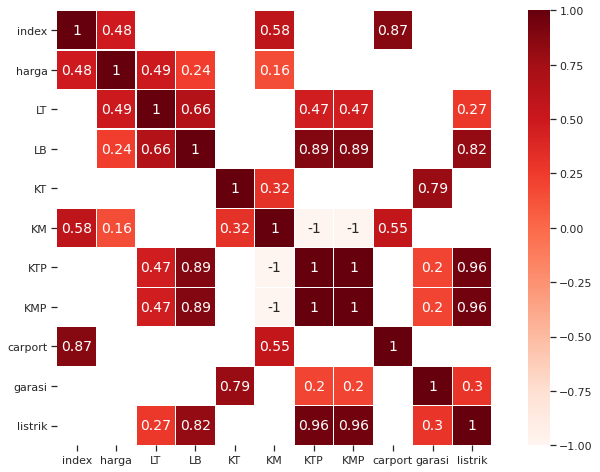

In [203]:
plt.figure(figsize=(13,8))
corr = high_price.corr()
sns.heatmap(corr[(corr > 0.1) | (corr <= -1)], 
            cmap='Reds', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 14}, square=True);

Variabel yang mempunyai hubungan yang kuat terhadap harga adalah:
-Luas Tanah
-Luas Bangunan
-Kamar Mandi

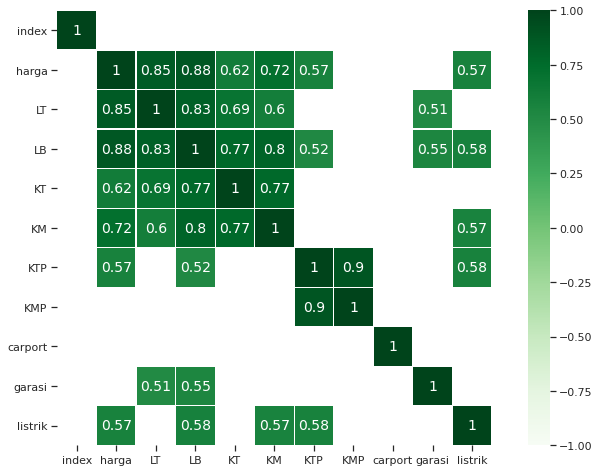

In [204]:
plt.figure(figsize=(13,8))
corr1 = low_price.corr()
sns.heatmap(corr1[(corr1 > 0.5) | (corr1 <= -1)], 
            cmap='Greens', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 14}, square=True);

Jika berdasarkan hasil dari rumah dengan harga rendah yang memiliki hubungan kuat dengan variabel harga adalah:
- Luas Bangunan
- Luas Tanah
- Kamar Mandi
- Kamar Tidur
- Listrik
- Kamar Tidur Pembantu

### Apakah ada perbedaan harga rumah berdasarkan surat tanah?

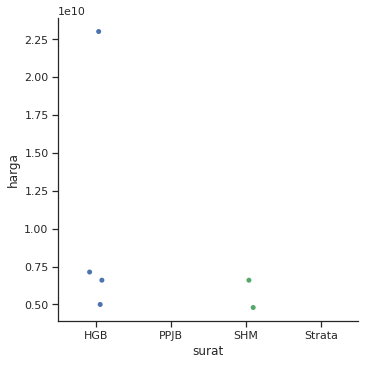

In [205]:
p = sns.catplot(x='surat',y='harga',data=high_price)

Harga rumah dengan surat HGB dan SHM hampir memiliki kesamaan, akan tetapi terdapat rumah dengan surat HGB yang memiliki harga tinggi setelah dianalisis dan dilihat kembali terdapat faktor lain yang tidak diketahui menyebabkan hal itu

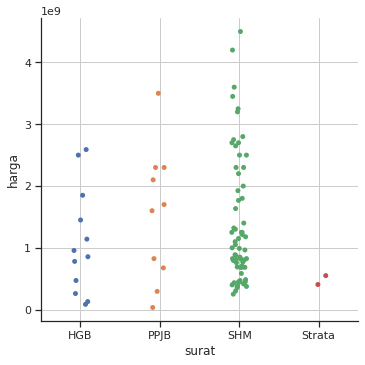

In [233]:
p = sns.catplot(x='surat',y='harga',data=low_price)
plt.grid()

Rumah dengan surat SHM cenderung memiliki harga yang paling tinggi dan SHM juga menjadi surat tanah yang paling banyak dimiliki oleh rumah pada umumnya, dilanjut dengan PPJB, HGB, lalu Strata

### Apakah ada perbedaan harga terhadap luas tanah dan luas bangunan?

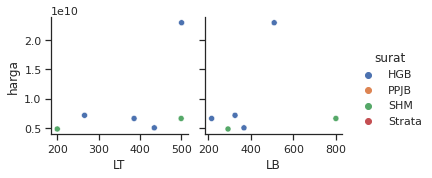

In [235]:
sns.pairplot(high_price,
            x_vars=['LT','LB'],
            y_vars=['harga'],
            hue='surat');

Luas Tanah dan Luas Bangunan tidak terlalu memberikan dampak yang signifikan atas harga penjualan rumah

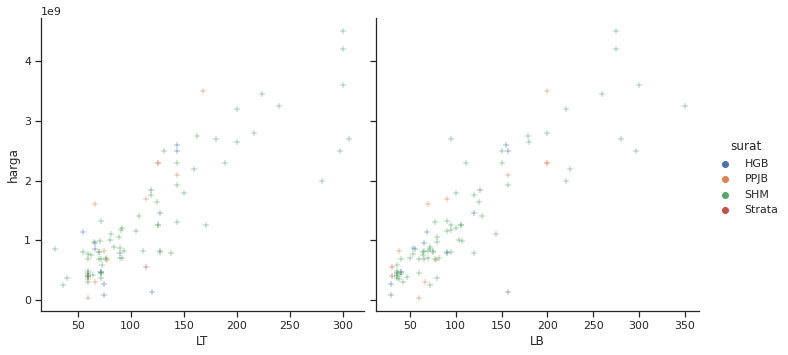

In [208]:
sns.pairplot(low_price,
            x_vars=['LT','LB'],
            y_vars=['harga'],
            hue='surat',
            height=5,markers='+');

Dari visualisasi data diatas untuk rumah dengan harga normal, Luas Tanah dan Luas Bangunan memengaruhi harga jual

### Apakah ada perbedaan harga terhadap jumlah kamar tidur dan kamar mandi?

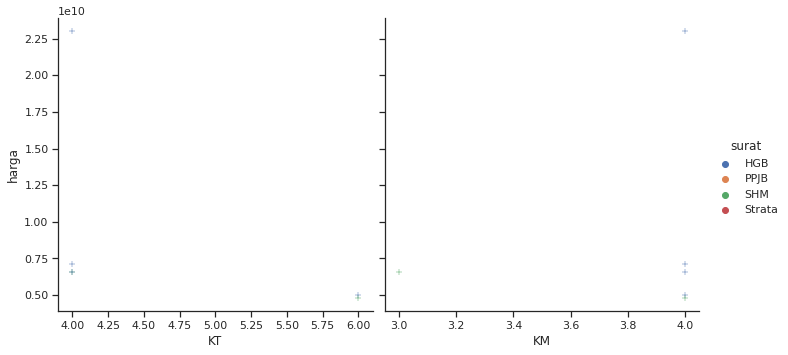

In [209]:
sns.pairplot(high_price,
            x_vars=['KT','KM'],
            y_vars=['harga'],
            hue='surat',
            height=5,markers='+');

Berdasarkan data rumah dengan harga tinggi jumlah kamar tidur yang rendah memiliki harga yang lebih mahal dibanding dengan kamar dengan jumlah banyak dan Kamar Mandi yang banyak mempengaruhi harga jual

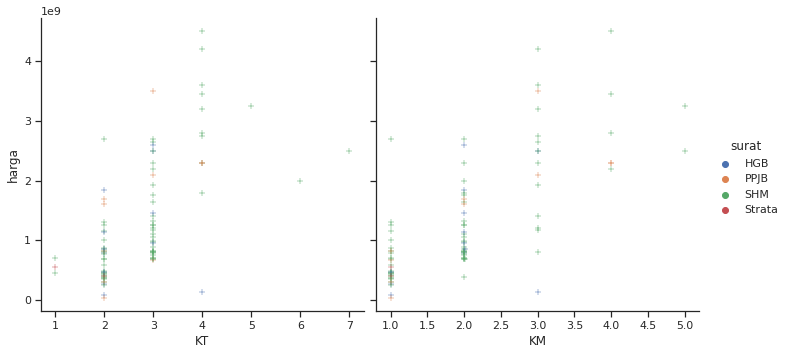

In [210]:
sns.pairplot(low_price,
            x_vars=['KT','KM'],
            y_vars=['harga'],
            hue='surat',
            height=5,
            markers='+');

1. Rumah dengan jumlah kamar tidur 2 & 3 adalah standart jumlah kamar yang dimiliki rumah pada umumnya
2. Rumah dengan kamar tidur 4 adalah jumlah yang cocok untuk rumah dengan harga tinggi
3. Rumah dengan yang memiki jumlah kamar mandi lebih tinggi dari 4 tidak
4. Kebanyakan kamar mandi 1 memiliki harga yang lebih murah
5. Jika diasumsikan Semakin banyak kamar mandi maka hargapun semakin naik, namun jika terlalu banyak kamar mandi hargapun akan turun. Titik ideal untuk kondisi ini adalah 4

# Clustering

In [211]:
!pip install --upgrade umap-learn
!wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/tau_unsup.py

Requirement already up-to-date: umap-learn in /usr/local/lib/python3.7/dist-packages (0.5.1)
--2021-04-11 06:34:17--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/tau_unsup.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17387 (17K) [text/plain]
Saving to: ‘tau_unsup.py.2’

tau_unsup.py.2      100%[===================>]  16.98K  --.-KB/s    in 0s      

2021-04-11 06:34:17 (63.5 MB/s) - ‘tau_unsup.py.2’ saved [17387/17387]



In [212]:
import warnings; warnings.simplefilter('ignore')
import umap, tau_unsup as tau
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score as siluet
from sklearn.metrics.cluster import homogeneity_score as purity
from sklearn.metrics import normalized_mutual_info_score as NMI

sns.set(style="ticks", color_codes=True)

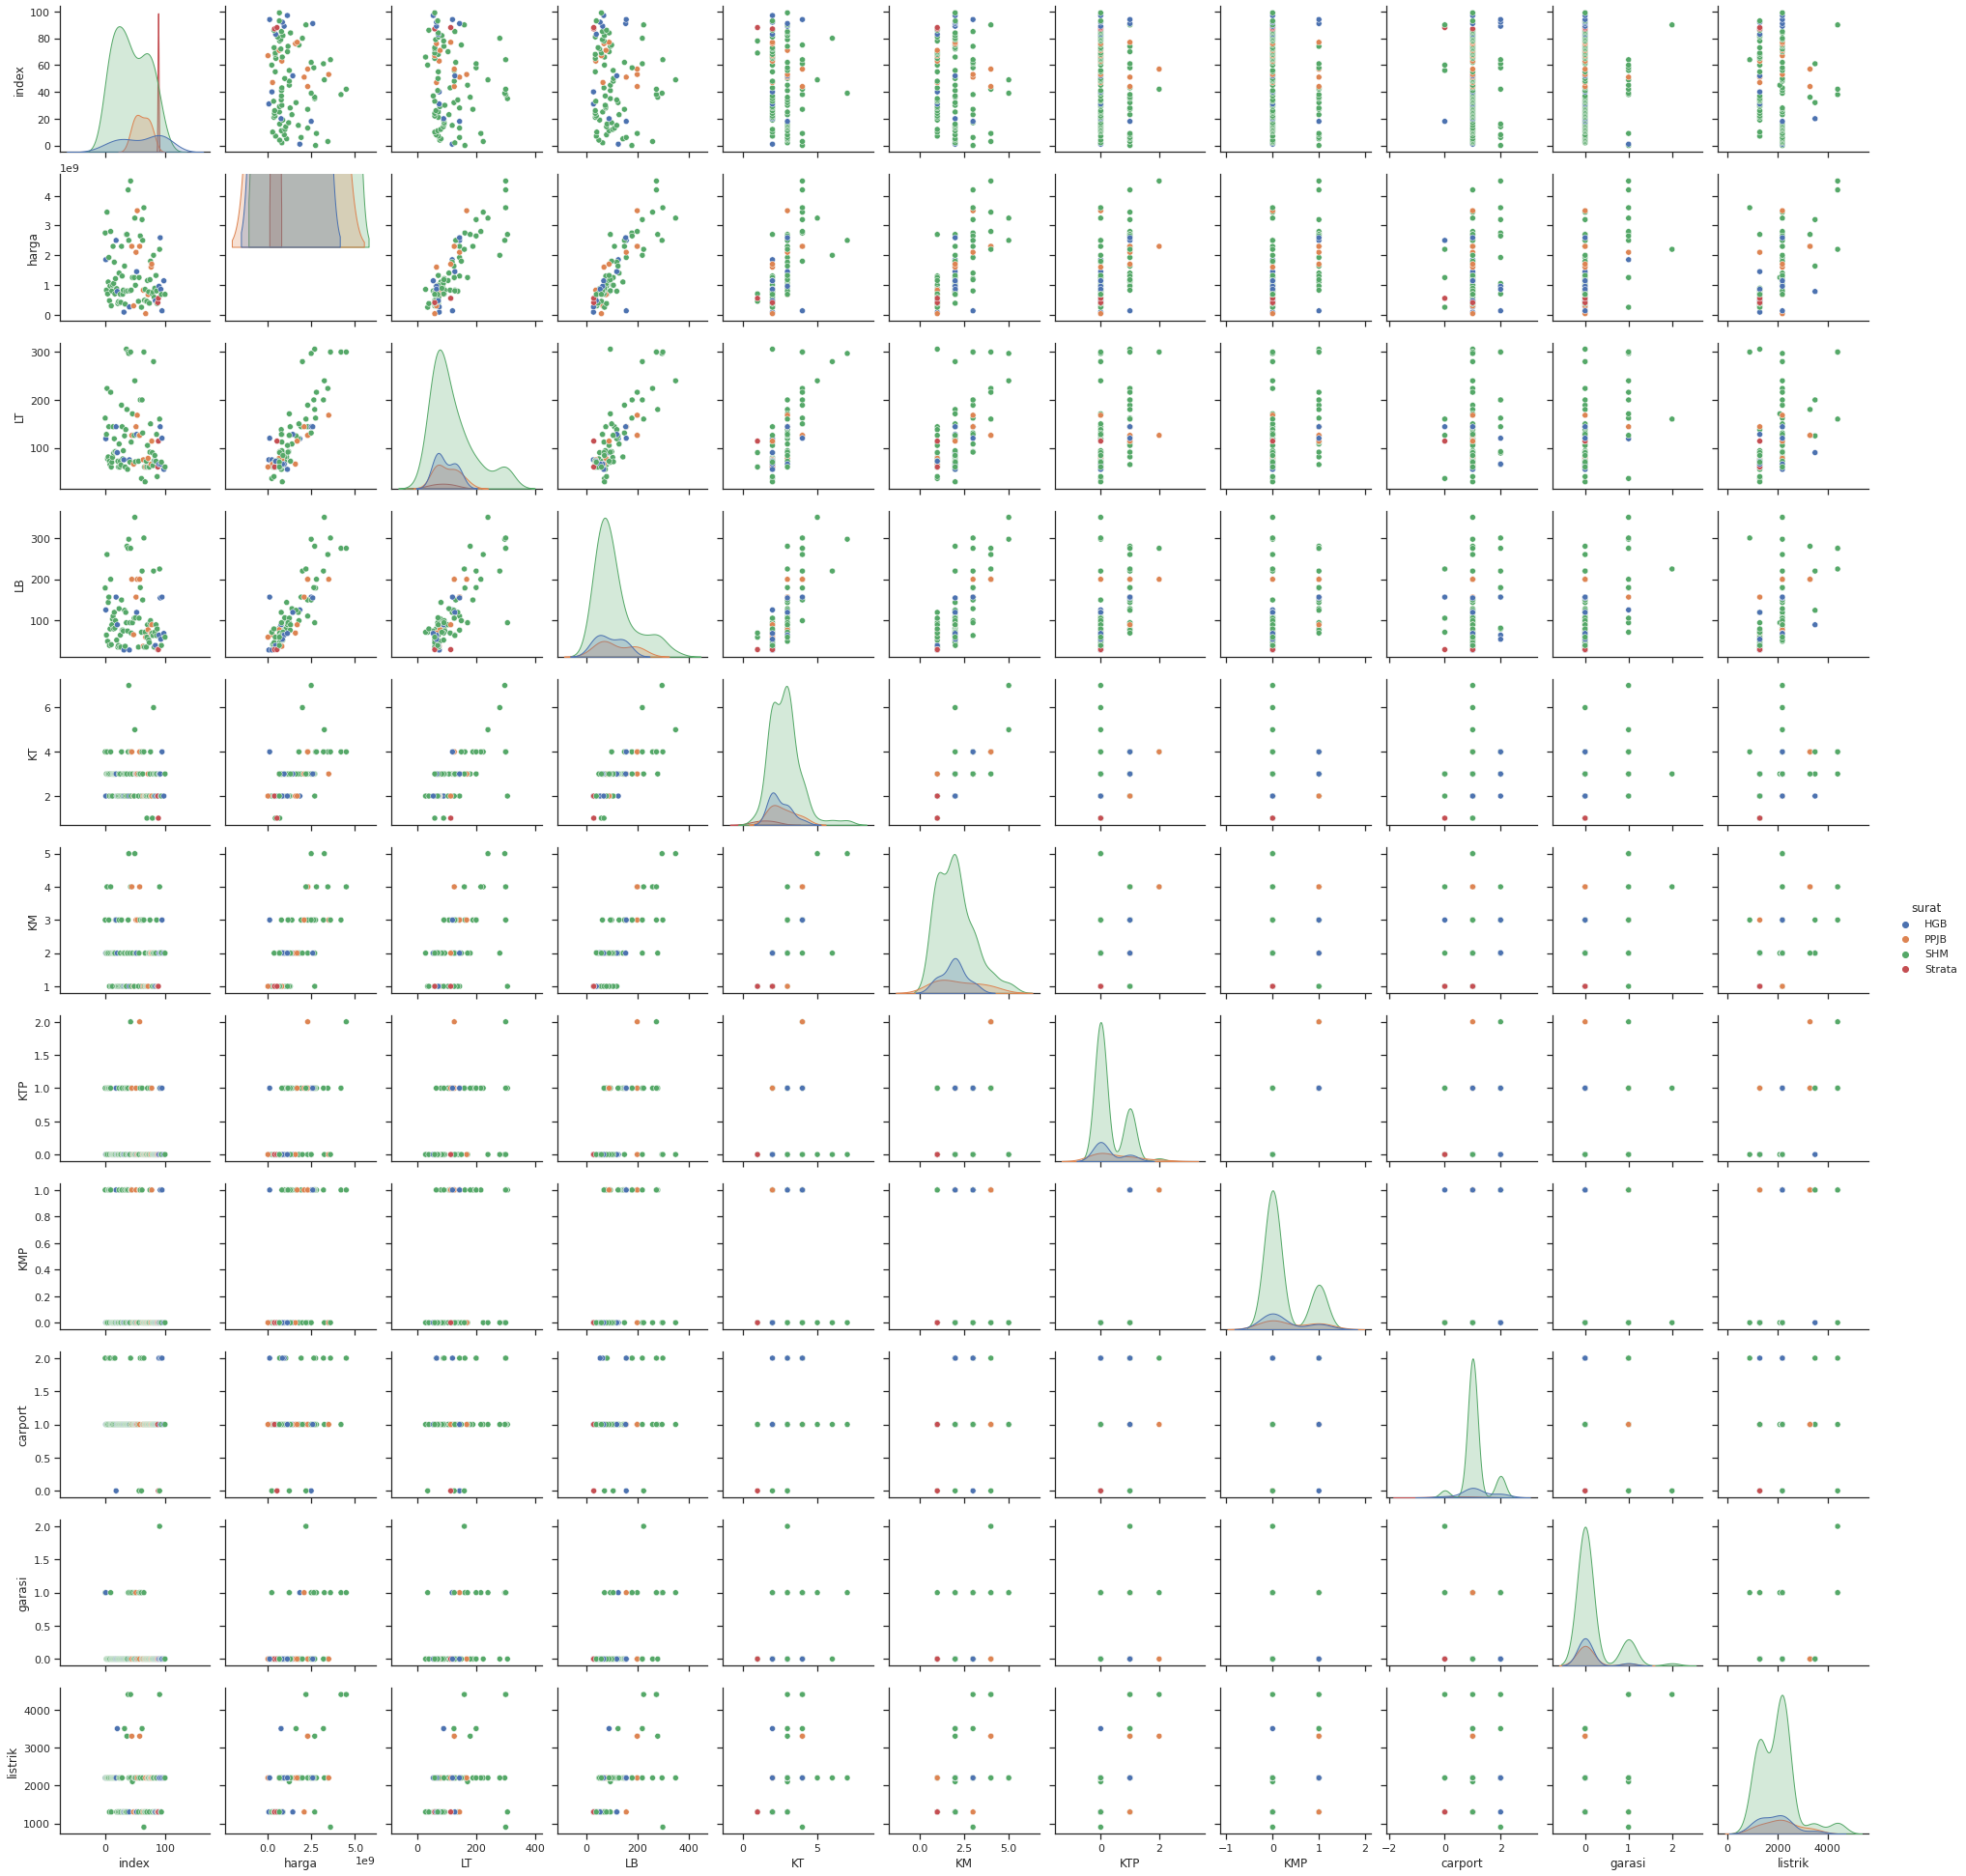

In [213]:
sns.pairplot(low_price,hue='surat');

In [214]:
low_price.iloc[:,1:-1].head()

,harga,LT,LB,KT,KM,KTP,KMP,carport,garasi,listrik
0,2750000000,162.0,179,4,3.0,1,1,2,1,2200.0
1,1850000000,119.0,126,2,2.0,0,0,1,1,2200.0
2,825000000,128.0,65,3,2.0,0,0,1,0,2200.0
3,3450000000,224.0,260,4,4.0,1,0,1,0,2200.0
4,700000000,77.0,50,3,2.0,0,0,1,0,2200.0


In [215]:
c_data = np.array(low_price.iloc[:,1:-1])
c_data[:5]

array([[2.75e+09, 1.62e+02, 1.79e+02, 4.00e+00, 3.00e+00, 1.00e+00,
        1.00e+00, 2.00e+00, 1.00e+00, 2.20e+03],
       [1.85e+09, 1.19e+02, 1.26e+02, 2.00e+00, 2.00e+00, 0.00e+00,
        0.00e+00, 1.00e+00, 1.00e+00, 2.20e+03],
       [8.25e+08, 1.28e+02, 6.50e+01, 3.00e+00, 2.00e+00, 0.00e+00,
        0.00e+00, 1.00e+00, 0.00e+00, 2.20e+03],
       [3.45e+09, 2.24e+02, 2.60e+02, 4.00e+00, 4.00e+00, 1.00e+00,
        0.00e+00, 1.00e+00, 0.00e+00, 2.20e+03],
       [7.00e+08, 7.70e+01, 5.00e+01, 3.00e+00, 2.00e+00, 0.00e+00,
        0.00e+00, 1.00e+00, 0.00e+00, 2.20e+03]])

In [216]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
c_scaled = mm.fit_transform(c_data)
c_scaled[:5]

array([[0.60815047, 0.4801444 , 0.46728972, 0.5       , 0.5       ,
        0.5       , 1.        , 1.        , 0.5       , 0.37142857],
       [0.40662785, 0.32490975, 0.30218069, 0.16666667, 0.25      ,
        0.        , 0.        , 0.5       , 0.5       , 0.37142857],
       [0.17711599, 0.35740072, 0.11214953, 0.33333333, 0.25      ,
        0.        , 0.        , 0.5       , 0.        , 0.37142857],
       [0.76489028, 0.70397112, 0.71962617, 0.5       , 0.75      ,
        0.5       , 0.        , 0.5       , 0.        , 0.37142857],
       [0.14912674, 0.1732852 , 0.06542056, 0.33333333, 0.25      ,
        0.        , 0.        , 0.5       , 0.        , 0.37142857]])

In [217]:
c_scaled = pd.DataFrame(c_scaled)
c_scaled.head()

,0,1,2,3,4,5,6,7,8,9
0,0.608150,0.480144,0.467290,0.500000,0.50,0.5,1.0,1.0,0.5,0.371429
1,0.406628,0.324910,0.302181,0.166667,0.25,0.0,0.0,0.5,0.5,0.371429
2,0.177116,0.357401,0.112150,0.333333,0.25,0.0,0.0,0.5,0.0,0.371429
3,0.764890,0.703971,0.719626,0.500000,0.75,0.5,0.0,0.5,0.0,0.371429
4,0.149127,0.173285,0.065421,0.333333,0.25,0.0,0.0,0.5,0.0,0.371429


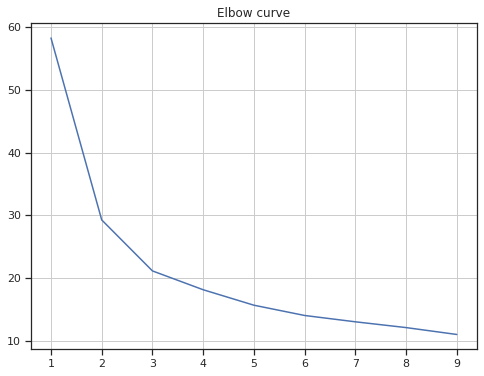

In [218]:
distorsions, k1, kN = [], 1, 10
for k in range(k1, kN):
    kmeans = KMeans(n_clusters=k).fit(c_scaled)
    distorsions.append(kmeans.inertia_)
plt.figure(figsize=(8, 6))
plt.plot(range(k1, kN), distorsions); plt.grid(True)
plt.title('Elbow curve');

In [219]:
# Menurut Elbow Method jumlah cluster adalah 3

array([0, 1, 1, 2, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 2, 1, 1, 0, 0,
       0, 1, 1, 1, 2, 1, 0, 1, 2, 1, 1, 0, 0, 1, 0, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       0, 1, 1, 0, 1, 1], dtype=int32)

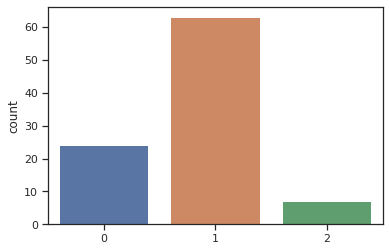

In [220]:
kmp = KMeans(n_clusters=3, init='k-means++', max_iter=300, tol=0.0001, n_jobs=-1, random_state = 42)
kmp.fit(c_scaled)
C_kmp = kmp.predict(c_scaled)

sns.countplot(C_kmp);
kmp.labels_

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0], dtype=int32)

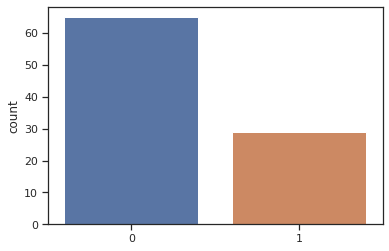

In [221]:
kmp1 = KMeans(n_clusters=2, init='k-means++', max_iter=300, tol=0.0001, n_jobs=-1, random_state = 42)
kmp1.fit(c_scaled)
C_kmp1 = kmp1.predict(c_scaled)

sns.countplot(C_kmp1);
kmp1.labels_

array([3, 1, 1, 2, 1, 0, 0, 1, 0, 3, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 3, 1, 3, 2, 1, 1, 3, 0,
       3, 1, 1, 1, 2, 1, 0, 1, 2, 1, 1, 3, 3, 1, 3, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       0, 1, 1, 0, 1, 1], dtype=int32)

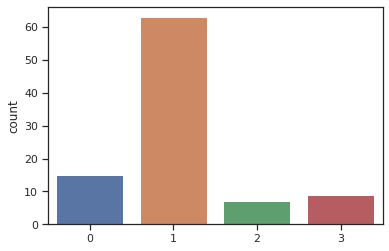

In [222]:
kmp2 = KMeans(n_clusters=4, init='k-means++', max_iter=300, tol=0.0001, n_jobs=-1, random_state = 42)
kmp2.fit(c_scaled)
C_kmp2 = kmp2.predict(c_scaled)

sns.countplot(C_kmp2);
kmp2.labels_

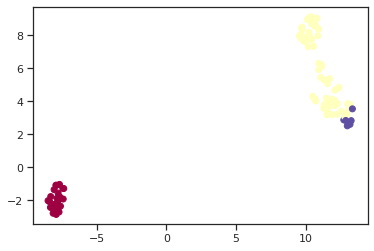

In [223]:
X2D = umap.UMAP(random_state=42).fit_transform(c_scaled)
fig, ax = plt.subplots()
ax.scatter(X2D[:,0], X2D[:,1], c=C_kmp, cmap='Spectral');

In [224]:
Hasil_Clustering = [C_kmp, C_kmp1, C_kmp2]
for res in Hasil_Clustering:
    print(siluet(c_scaled,res), end=', ')

0.560535791637833, 0.5393306017342692, 0.5101374167563938, 

In [225]:
kmp.cluster_centers_

array([[0.47518286, 0.47307461, 0.40900831, 0.36805556, 0.41666667,
        0.54166667, 1.        , 0.625     , 0.125     , 0.47261905],
       [0.1767769 , 0.19380163, 0.12559956, 0.22751323, 0.14294341,
        0.00793651, 0.        , 0.50793651, 0.03174603, 0.24217687],
       [0.64810313, 0.75605982, 0.73386738, 0.5952381 , 0.67857143,
        0.14285714, 0.        , 0.5       , 0.35714286, 0.40816327]])

In [226]:
low_price.columns

Index(['index', 'harga', 'LT', 'LB', 'KT', 'KM', 'KTP', 'KMP', 'carport',
       'garasi', 'listrik', 'surat'],
      dtype='object')

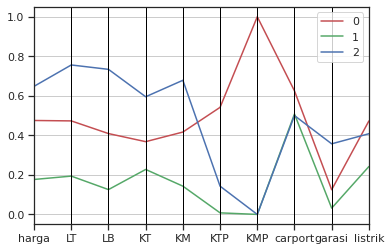

In [227]:
cols = ['harga','LT','LB','KT','KM','KTP','KMP','carport','garasi','listrik']
dfC = pd.DataFrame(kmp.cluster_centers_, columns=cols)
dfC['cluster'] = dfC.index

pd.plotting.parallel_coordinates(dfC, 'cluster', color=('r', 'g', 'b'))
plt.show()

In [228]:
low_price['cluster'] = kmp.labels_
low_price.head()

,index,harga,LT,LB,KT,KM,KTP,KMP,carport,garasi,listrik,surat,cluster
0,0,2750000000,162.0,179,4,3.0,1,1,2,1,2200.0,SHM,0
1,1,1850000000,119.0,126,2,2.0,0,0,1,1,2200.0,HGB,1
2,2,825000000,128.0,65,3,2.0,0,0,1,0,2200.0,SHM,1
3,3,3450000000,224.0,260,4,4.0,1,0,1,0,2200.0,SHM,2
4,4,700000000,77.0,50,3,2.0,0,0,1,0,2200.0,SHM,1


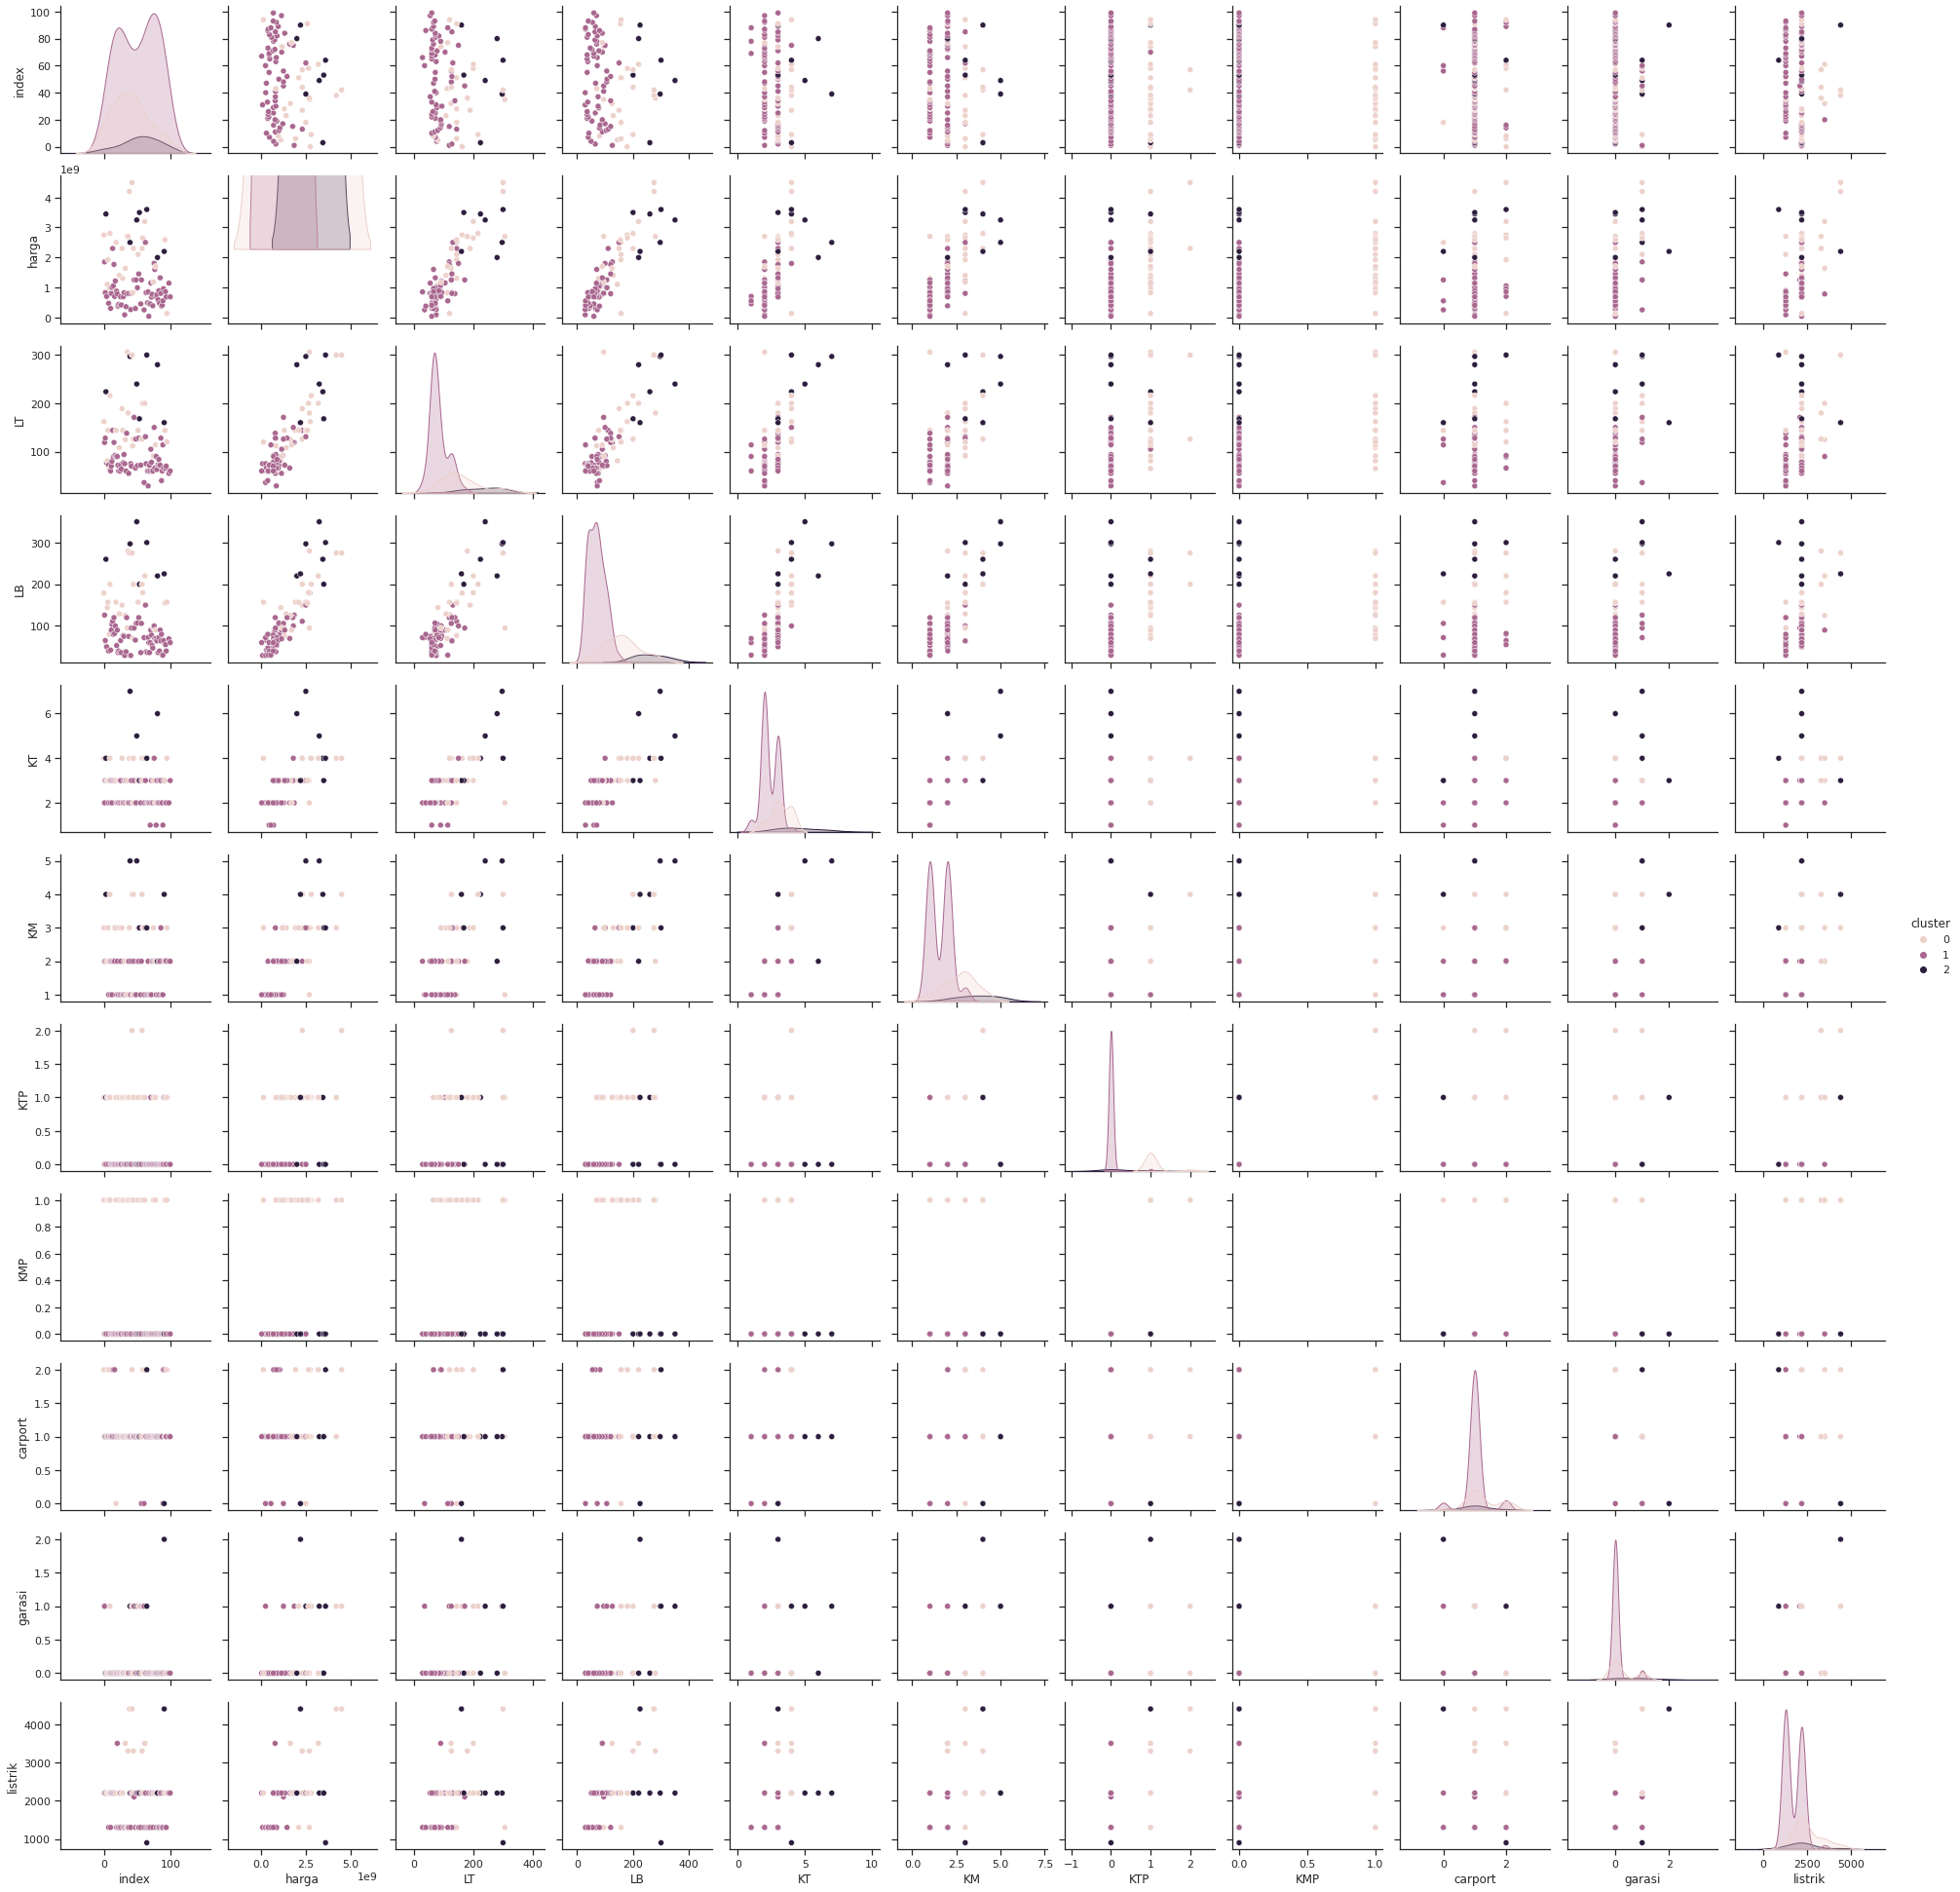

In [229]:
sns.pairplot(low_price,hue='cluster');

# Regresi
